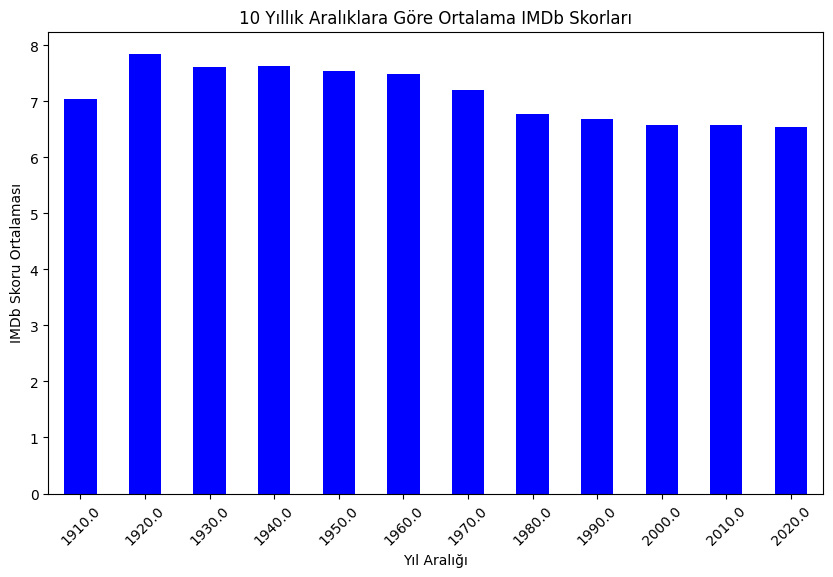

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv')

# Yıl sütununu integer'a dönüştürme
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Yıl ve imdb skorlarını içeren bir alt küme oluşturma
year_imdb = data[['year', 'imdb']]

# Yılları 10'ar yıllık aralıklara göre gruplama
year_groups = year_imdb.groupby((year_imdb['year'] // 10) * 10)

# Her 10 yıllık grupta imdb skorlarının ortalamasını hesaplama
mean_scores = year_groups['imdb'].mean()

# Grafik çizimi
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='blue')
plt.title("10 Yıllık Aralıklara Göre Ortalama IMDb Skorları")
plt.xlabel("Yıl Aralığı")
plt.ylabel("IMDb Skoru Ortalaması")
plt.xticks(rotation=45)
plt.show()


In [39]:
genre_ratings = {}
imdb_data = pd.read_csv('data.csv')

for index, row in imdb_data.iterrows():
    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()  # Boşlukları temizle
        imdb_rating = float(row['imdb'])
        if genre in genre_ratings:
            genre_ratings[genre].append(imdb_rating)
        else:
            genre_ratings[genre] = [imdb_rating]

genre_avg_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

print(genre_avg_ratings)


{'Drama': 6.920783441669468, 'Crime': 6.757697841726648, 'Comedy': 6.555561643835565, 'Adventure': 6.611389385807981, 'Animation': 6.935269709543576, 'Action': 6.532770406111791, 'Biography': 7.109558823529396, 'History': 7.085459940652813, 'Mystery': 6.5400752587017745, 'Thriller': 6.509667852906286, 'Fantasy': 6.463573407202201, 'Sci-Fi': 6.443895348837213, 'Romance': 6.688140472078285, 'Western': 7.1283185840707946, 'Horror': 6.146682847896446, 'Family': 6.551762114537442, 'Music': 6.867491166077743, 'War': 7.211063829787228, 'Sport': 6.759405940594056, 'Film-Noir': 7.680000000000002, 'Musical': 7.000775193798448}


In [40]:
genre_counts = {}

for index, row in imdb_data.iterrows():
    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

print("Genre Counts:")
for genre, count in sorted_genres:
    print(f"{genre}: {count}")

Genre Counts:
Drama: 5846
Comedy: 3650
Action: 2487
Crime: 2085
Romance: 1737
Thriller: 1686
Adventure: 1677
Horror: 1236
Mystery: 1063
Fantasy: 722
Sci-Fi: 688
Biography: 680
Animation: 482
Family: 454
History: 337
Music: 283
War: 235
Sport: 202
Musical: 129
Western: 113
Film-Noir: 60


C:\Users\mertc\AppData\Local\Temp\ipykernel_13948\1441898709.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genres, rotation=90, ha='right')


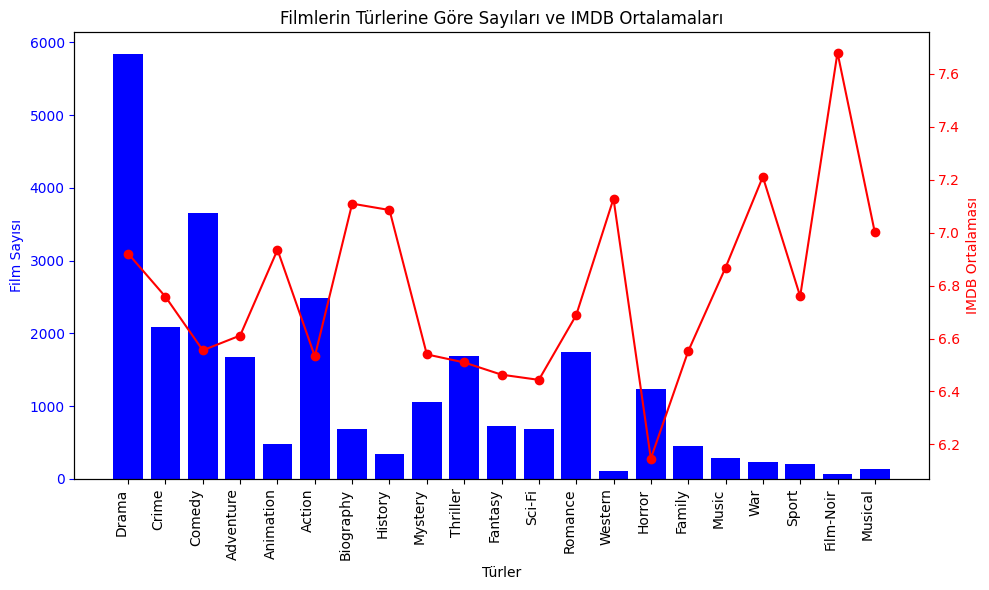

In [41]:
import matplotlib.pyplot as plt

genre_counts = {}
genre_imdb_avg = {}

for index, row in imdb_data.iterrows():
    genres = row['genre'].split(',')
    imdb_score = row['imdb']

    for genre in genres:
        genre = genre.strip()
        if genre in genre_counts:
            genre_counts[genre] += 1
            genre_imdb_avg[genre] += imdb_score
        else:
            genre_counts[genre] = 1
            genre_imdb_avg[genre] = imdb_score

# IMDB ortalamalarını hesapla
for genre in genre_imdb_avg:
    genre_imdb_avg[genre] /= genre_counts[genre]

# Çubuk grafik oluştur
genres = list(genre_counts.keys())
counts = list(genre_counts.values())
imdb_avgs = list(genre_imdb_avg.values())

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(genres, counts, color='blue')
ax1.set_xlabel('Türler')
ax1.set_ylabel('Film Sayısı', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticklabels(genres, rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.plot(genres, imdb_avgs, color='red', marker='o')
ax2.set_ylabel('IMDB Ortalaması', color='red')
ax2.tick_params('y', colors='red')

plt.title('Filmlerin Türlerine Göre Sayıları ve IMDB Ortalamaları')
plt.tight_layout()
plt.show()


In [42]:
actor_film_counts = {}

for index, row in imdb_data.iterrows():
    actors = row['actors']

    if isinstance(actors, str):  # NaN kontrolü
        actor_list = actors.split('\t')

        for actor in actor_list:
            actor = actor.strip()
            if actor in actor_film_counts:
                actor_film_counts[actor] += 1
            else:
                actor_film_counts[actor] = 1

print(actor_film_counts)

{'Tim Robbins': 28, 'Morgan Freeman': 53, 'Bob Gunton': 3, 'William Sadler': 8, 'Marlon Brando': 19, 'Al Pacino': 38, 'James Caan': 18, 'Diane Keaton': 28, 'Kemal Sunal': 12, 'Münir Özkul': 5, 'Halit Akçatepe': 4, 'Tarik Akan': 3, 'Vishal Mourya': 1, 'Karan Kandhapan': 1, 'Babushan Mohanty': 1, 'Dipanwit Dashmohapatra': 1, 'Manaswani Takri': 1, 'Kemp Powers': 2, 'Justin K. Thompson': 1, 'Shameik Moore': 4, 'Hailee Steinfeld': 10, 'Brian Tyree Henry': 5, 'Luna Lauren Velez': 2, 'Christian Bale': 37, 'Heath Ledger': 15, 'Aaron Eckhart': 24, 'Michael Caine': 47, 'Liam Neeson': 49, 'Ralph Fiennes': 31, 'Ben Kingsley': 33, 'Caroline Goodall': 3, 'Henry Fonda': 19, 'Lee J. Cobb': 4, 'Martin Balsam': 9, 'John Fiedler': 3, 'Robert De Niro': 72, 'Robert Duvall': 30, 'Elijah Wood': 24, 'Viggo Mortensen': 19, 'Ian McKellen': 19, 'Orlando Bloom': 14, 'Chanchal Chowdhury': 1, 'Masuma Rahman Nabila': 1, 'Partha Barua': 1, 'Lutfur Rahman George': 1, 'John Travolta': 38, 'Uma Thurman': 23, 'Samuel L. 

In [43]:
top_20_actors = sorted(actor_film_counts.items(), key=lambda x: x[1], reverse=True)[:20]

for actor, film_count in top_20_actors:
    print(f"{actor}: {film_count} films")


Robert De Niro: 72 films
Samuel L. Jackson: 63 films
Nicolas Cage: 63 films
Bruce Willis: 56 films
Morgan Freeman: 53 films
Tom Hanks: 53 films
Nicole Kidman: 50 films
Liam Neeson: 49 films
Clint Eastwood: 49 films
Johnny Depp: 49 films
Michael Caine: 47 films
Anthony Hopkins: 47 films
Julianne Moore: 47 films
Dennis Quaid: 47 films
Mark Wahlberg: 46 films
Akshay Kumar: 46 films
Jackie Chan: 46 films
Matt Damon: 45 films
Ewan McGregor: 45 films
Meryl Streep: 45 films


C:\Users\mertc\AppData\Local\Temp\ipykernel_13948\684545382.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actors, rotation=90)


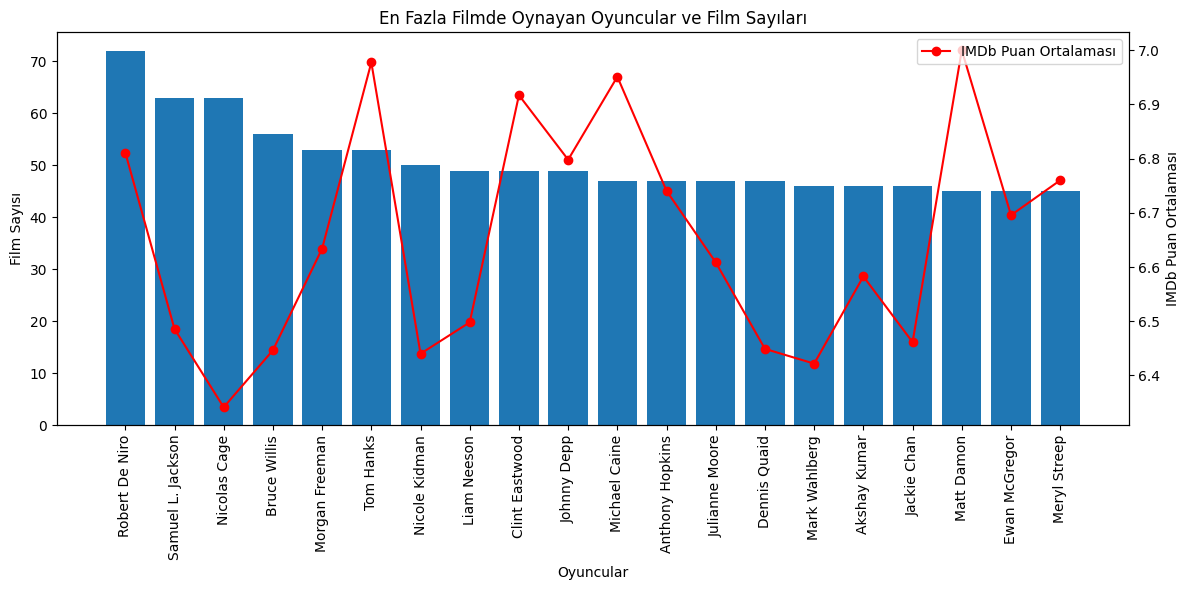

In [44]:
import matplotlib.pyplot as plt

actor_info = []
for actor, movie_count in top_20_actors:
    actor_movies = imdb_data[imdb_data['actors'].apply(lambda x: actor in str(x))]
    average_rating = actor_movies['imdb'].mean()
    actor_info.append((actor, movie_count, average_rating))

# Sıralı aktör bilgileri
sorted_actor_info = sorted(actor_info, key=lambda x: x[1], reverse=True)

# Grafik için x ve y değerlerini belirler
actors = [actor for actor, _, _ in sorted_actor_info]
film_counts = [movie_count for _, movie_count, _ in sorted_actor_info]
average_ratings = [average_rating for _, _, average_rating in sorted_actor_info]

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(actors, film_counts, label='Film Sayısı')
ax.set_xlabel('Oyuncular')
ax.set_ylabel('Film Sayısı')
ax.set_title('En Fazla Filmde Oynayan Oyuncular ve Film Sayıları')
ax.set_xticklabels(actors, rotation=90)
ax2 = ax.twinx()
ax2.plot(actors, average_ratings, color='red', marker='o', label='IMDb Puan Ortalaması')
ax2.set_ylabel('IMDb Puan Ortalaması')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [45]:
director_film_counts = data['director'].value_counts().to_dict()
print(director_film_counts)

{'Woody Allen': 48, 'Clint Eastwood': 37, 'Alfred Hitchcock': 37, 'Steven Spielberg': 33, 'Steven Soderbergh': 28, 'Ridley Scott': 27, 'Ron Howard': 26, 'Martin Scorsese': 24, 'Brian De Palma': 21, 'Robert Zemeckis': 20, 'Richard Linklater': 20, 'Pedro Almodóvar': 19, 'Joel Schumacher': 19, 'Tim Burton': 19, 'Roman Polanski': 19, 'David Cronenberg': 19, 'Oliver Stone': 18, 'Walter Hill': 18, 'John Carpenter': 18, 'Spike Lee': 17, 'Richard Donner': 17, 'Billy Wilder': 17, 'Barry Levinson': 17, 'Tony Scott': 16, 'Rob Reiner': 16, 'Akira Kurosawa': 16, 'Francis Ford Coppola': 16, 'Lasse Hallström': 16, 'Stephen Frears': 16, 'Renny Harlin': 16, 'Ingmar Bergman': 16, 'Neil Jordan': 16, 'Wes Craven': 16, 'Blake Edwards': 15, 'Ivan Reitman': 15, 'Howard Hawks': 15, 'Chris Columbus': 15, 'Michael Bay': 15, 'Gus Van Sant': 15, 'Antoine Fuqua': 15, 'Mike Nichols': 15, 'Sidney Lumet': 15, 'William Wyler': 15, 'Luc Besson': 15, 'Joe Dante': 14, 'Sam Raimi': 14, 'Robert Altman': 14, 'John Landis': 

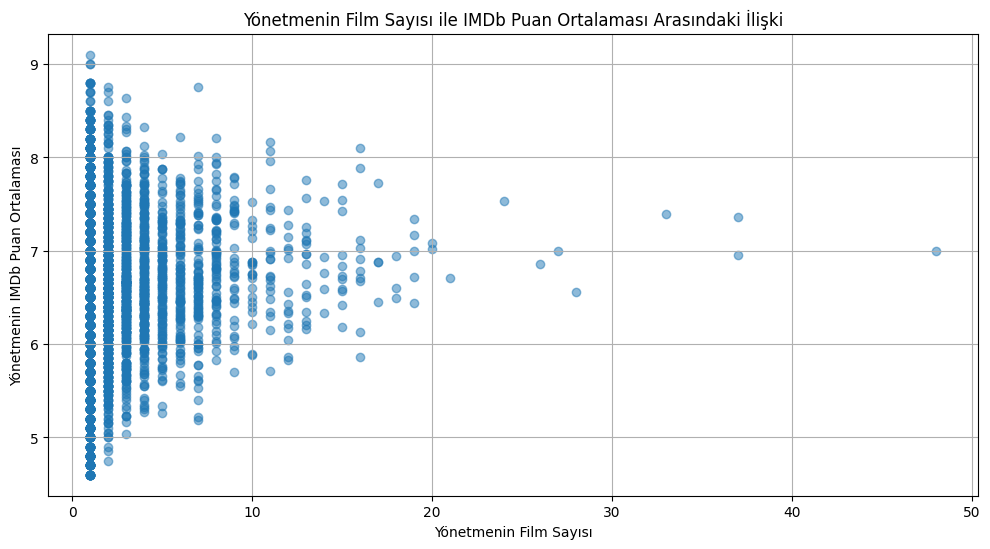

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

director_counts = data['director'].value_counts()
director_avg_imdb = data.groupby('director')['imdb'].mean()


director_data = pd.DataFrame({'Film Sayısı': director_counts, 'IMDb Ortalaması': director_avg_imdb})

# Plot grafiğini oluştur
plt.figure(figsize=(12, 6))
plt.scatter(director_data['Film Sayısı'], director_data['IMDb Ortalaması'], alpha=0.5)
plt.xlabel('Yönetmenin Film Sayısı')
plt.ylabel('Yönetmenin IMDb Puan Ortalaması')
plt.title('Yönetmenin Film Sayısı ile IMDb Puan Ortalaması Arasındaki İlişki')
plt.grid(True)
plt.show()